<a href="https://colab.research.google.com/github/LorenzoBelenguer/Sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis

dataset source: https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets


In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("sentiment_tweets.csv")

In [3]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [4]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [5]:
list_text=list(df["Text"]) # text column converted into a list
list_text

['@Logitech @apple @Google @Microsoft @Dell @Lenovo #WhatIf QWERTY were modified for programmers so things like brackets, parens, quotes, operators, etc. moved to the middle near G-H splitting left/right brackets to separate hands, and relieving the less dextrous pinky finger?',
 "@MK_habit_addict @official_stier @MortalKombat @newzealand She's getting a new @Dell #laptop when the one she has one only 2-3 years old.  (More than triple the price - though much higher utility). https://t.co/7WvkCw7vQf",
 'As\xa0@CRN\xa0celebrates its 40th anniversary,\xa0Bob Faletra\xa0and\xa0@stevenjburke\xa0spoke with me about the milestones, companies and personalities that helped build the channel.\xa0https://t.co/stiuBObP1O #CRN40\xa0#podcast\xa0#internationalpodcastday @Cisco @Microsoft @HPE @hp @Dell @intel',
 '@dell your customer service is horrible especially agent syedfaisal who has made this experience of purchasing a new computer downright awful and I’ll reconsider ever buying a Dell in the fu

In [6]:
from collections import Counter

count = Counter()
for text in df['Text']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words=count.most_common(20) # showing he top 20
common_words

[('', 14953),
 ('Dell ', 7840),
 ('MichaelDell ', 1580),
 ('DellCares ', 1095),
 ('Twitter ', 1082),
 ('elonmusk ', 1051),
 ('Microsoft ', 628),
 ('HP ', 596),
 ('Dell', 549),
 ('Alienware ', 523),
 ('Dell_IN ', 461),
 ('DellTech ', 430),
 ('starwars ', 342),
 ('TheRock ', 337),
 ('ScienceNews ', 336),
 ('steveaustinBSR\xa0 ', 334),
 ('WWEUniverse\xa0 ', 334),
 ('playstation ', 333),
 ('JohnCena #psndown ', 331),
 ('CountryMusic\xa0', 326)]

In [7]:
df_common_wd= pd.DataFrame(common_words) # there seems to be a missing value inthe first row
df_common_wd

,0,1
0,,14953
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523


In [8]:
df_common_wd.dropna() #I"m going to remove the missing value, but it doesn't. So there must be value that it's not showing

,0,1
0,,14953
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523


In [9]:
df_common_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [10]:
df_common_wd=df_common_wd.drop(0)

In [11]:
df_common_wd= df_common_wd.rename(columns={0: 'word'}) # I'm going to remove the first row as empty
df_common_wd= df_common_wd.rename(columns={1: 'count'})
df_common_wd.style.background_gradient(cmap='Blues')

,word,count
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523
10,Dell_IN,461


In [12]:
import plotly.express as px

fig = px.bar(df_common_wd, x="word", y="count") # show a bar chart
fig.show()

In [13]:
fig2= px.treemap(df_common_wd, path=['word'], values='count')
fig2.show()

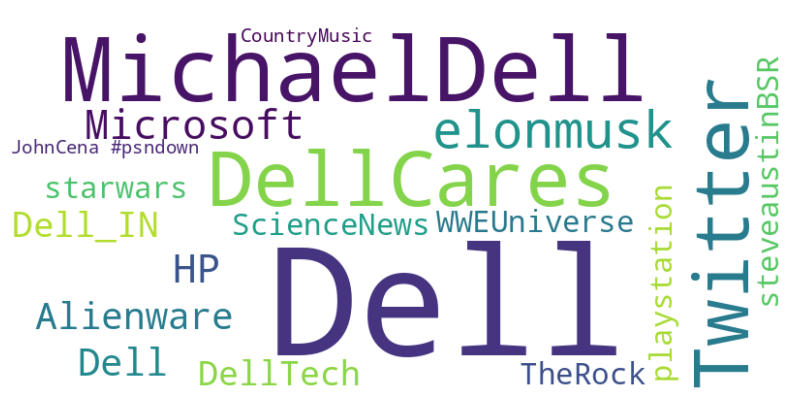

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict = dict(zip(df_common_wd['word'], df_common_wd['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 1-Look for the most common sentiment and emotion in both respective columns. Plot the most common words in a treemap or word count as above.

## 2- Filter out the positive sentiment's texts from the initial dataframe, count and show what are the main words from this categoty. Do the same for the negative sentiments.

In [16]:
df= pd.read_csv("sentiment_tweets.csv")
only_positive = df[df["sentiment"].str.contains("positive")] # only the positive
only_positive

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
7,7,2022-09-30 19:25:45+00:00,1575929914888421395,COOKING STREAM DAY!!! Ty to @Alienware for spo...,emijuju_,positive,0.974963,joy,0.961772
8,8,2022-09-30 19:07:30+00:00,1575925320070623232,@emijuju_ @Alienware @Dell @intel Beautiful 😍❤️😻,Khurram38256043,positive,0.974661,joy,0.986383
10,10,2022-09-30 19:01:43+00:00,1575923864986583048,What does it take to delight stakeholders with...,AccelBI,positive,0.735677,optimism,0.799289
11,11,2022-09-30 18:59:41+00:00,1575923355844505600,@BigwillUK @Alienware @Dell Good idea. I'll pu...,teksyndicate,positive,0.942130,anticipation,0.801982
...,...,...,...,...,...,...,...,...,...
24960,24960,2022-01-01 05:05:51+00:00,1477144011743776770,2 Voice life is already ahead of the game in t...,mbreezyy25,positive,0.680777,joy,0.833744
24963,24963,2022-01-01 04:10:42+00:00,1477130134557794305,@Cederick @Dell This is why you buy @HP 😉 I've...,WarlordofTheFly,positive,0.967071,optimism,0.917599
24964,24964,2022-01-01 02:30:35+00:00,1477104939809845248,@GamersNexus @ThePCPIT1 @Dell @FTC And I love ...,bradeinarsen,positive,0.470891,joy,0.984710
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701


In [55]:

# replace 'dell' with 'Dell'
only_positive.replace('dell', 'Dell')
# replace 'Dell,' with 'Dell'
only_positive.replace('Dell,', 'Dell')
# replace 'The' with '@'
only_positive.replace('The', '@')
# replace 'Dell and' with 'Dell'
only_positive.replace('Dell and', 'Dell')

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
7,7,2022-09-30 19:25:45+00:00,1575929914888421395,COOKING STREAM DAY!!! Ty to @Alienware for spo...,emijuju_,positive,0.974963,joy,0.961772
8,8,2022-09-30 19:07:30+00:00,1575925320070623232,@emijuju_ @Alienware @Dell @intel Beautiful 😍❤️😻,Khurram38256043,positive,0.974661,joy,0.986383
10,10,2022-09-30 19:01:43+00:00,1575923864986583048,What does it take to delight stakeholders with...,AccelBI,positive,0.735677,optimism,0.799289
11,11,2022-09-30 18:59:41+00:00,1575923355844505600,@BigwillUK @Alienware @Dell Good idea. I'll pu...,teksyndicate,positive,0.942130,anticipation,0.801982
...,...,...,...,...,...,...,...,...,...
24960,24960,2022-01-01 05:05:51+00:00,1477144011743776770,2 Voice life is already ahead of the game in t...,mbreezyy25,positive,0.680777,joy,0.833744
24963,24963,2022-01-01 04:10:42+00:00,1477130134557794305,@Cederick @Dell This is why you buy @HP 😉 I've...,WarlordofTheFly,positive,0.967071,optimism,0.917599
24964,24964,2022-01-01 02:30:35+00:00,1477104939809845248,@GamersNexus @ThePCPIT1 @Dell @FTC And I love ...,bradeinarsen,positive,0.470891,joy,0.984710
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701


In [56]:
count = Counter()
for text in only_positive['Text']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words_positive=count.most_common(20) # showing he top 20
common_words_positive

[('', 3534),
 ('Dell ', 1910),
 ('MichaelDell ', 329),
 ('Twitter ', 318),
 ('elonmusk ', 292),
 ('Alienware ', 216),
 ('intelcanada ', 158),
 ('DellTech ', 143),
 ('intel ', 130),
 ('Dell, ', 120),
 ('HP ', 111),
 ('Dell and ', 105),
 ('Lenovo ', 91),
 ('Dell', 86),
 ('Microsoft ', 85),
 ('Apple ', 83),
 ('.', 82),
 ('The ', 66),
 ('dell ', 62),
 ('brittlestar ', 59)]

In [57]:
df_common_positive= pd.DataFrame(common_words_positive) # there seems to be a missing value inthe firstrow
df_common_positive

,0,1
0,,3534
1,Dell,1910
2,MichaelDell,329
3,Twitter,318
4,elonmusk,292
5,Alienware,216
6,intelcanada,158
7,DellTech,143
8,intel,130
9,"Dell,",120


In [58]:
df_common_positive.dropna() #I"m going to remove the missing value, but it doesn't. So there must be value that it's not showing

,0,1
0,,3534
1,Dell,1910
2,MichaelDell,329
3,Twitter,318
4,elonmusk,292
5,Alienware,216
6,intelcanada,158
7,DellTech,143
8,intel,130
9,"Dell,",120


In [59]:
df_common_positive=df_common_positive.drop(0)

In [60]:
df_common_positive= df_common_positive.rename(columns={0: 'word'}) # I'm going to remove the first row as empty
df_common_positive= df_common_positive.rename(columns={1: 'count'})
df_common_positive.style.background_gradient(cmap='Blues')

,word,count
1,Dell,1910
2,MichaelDell,329
3,Twitter,318
4,elonmusk,292
5,Alienware,216
6,intelcanada,158
7,DellTech,143
8,intel,130
9,"Dell,",120
10,HP,111


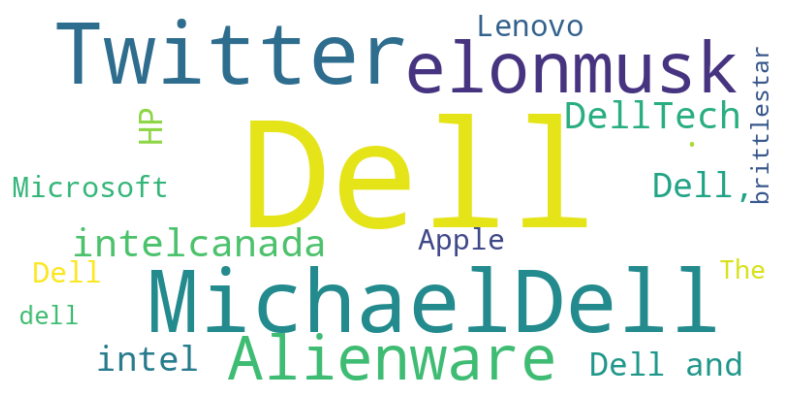

In [61]:
# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict1 = dict(zip(df_common_positive['word'], df_common_positive['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict1)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df= pd.read_csv("sentiment_tweets.csv")
only_negative = df[df["sentiment"].str.contains("negative")] # only the negative
only_negative

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
5,5,2022-09-30 19:49:40+00:00,1575935931969785856,The screenshot is acting up from the website o...,jonathanj92389,negative,0.936235,sadness,0.968651
17,17,2022-09-30 17:50:21+00:00,1575905906264621071,ummm @Dell ...your customer service is trash,travdad666,negative,0.949175,anger,0.985274
20,20,2022-09-30 17:30:55+00:00,1575901016616488960,Itsss been more than a week...i m following up...,rai_savita,negative,0.904967,sadness,0.948668
22,22,2022-09-30 17:25:33+00:00,1575899664498720768,@Dell If you are a Dell user then the emojis t...,ashu_k7,negative,0.899458,anger,0.957541
...,...,...,...,...,...,...,...,...,...
24950,24950,2022-01-01 11:04:58+00:00,1477234386235838466,@DellCares Till Now you didn't Shared any Sens...,ehsanECE,negative,0.840990,anger,0.974300
24957,24957,2022-01-01 06:58:14+00:00,1477172296926339075,@GamersNexus @Dell @DellCares @Dell Everyone k...,parody_is_legal,negative,0.810775,anger,0.981074
24959,24959,2022-01-01 05:14:04+00:00,1477146082333249538,@Dell Dell technology is worst type. Using che...,aEBR9y3Z2LFI6jO,negative,0.940346,anger,0.925445
24961,24961,2022-01-01 04:52:58+00:00,1477140770956132352,@Corleone250 @Dell Seen it. But it's not as go...,JoshTheFixer,negative,0.863683,disgust,0.609536


In [41]:
# replace 'dell' with 'Dell'
only_negative.replace('dell', 'Dell')
# replace 'Dell,' with 'Dell'
only_negative.replace('Dell,', 'Dell')
# replace 'The' with '@'
only_negative.replace('The', '@')
# replace 'Dell and' with 'Dell'
only_negative.replace('Dell ', 'Dell')
# replace 'Hey ' with '@'
only_negative.replace('Hey', '@')
# replace 'dell ' with 'Dell'
only_negative.replace('dell ', 'Dell')
# replace 'Dell ' with 'Dell'
only_negative.replace('dell ', 'Dell')

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
5,5,2022-09-30 19:49:40+00:00,1575935931969785856,The screenshot is acting up from the website o...,jonathanj92389,negative,0.936235,sadness,0.968651
17,17,2022-09-30 17:50:21+00:00,1575905906264621071,ummm @Dell ...your customer service is trash,travdad666,negative,0.949175,anger,0.985274
20,20,2022-09-30 17:30:55+00:00,1575901016616488960,Itsss been more than a week...i m following up...,rai_savita,negative,0.904967,sadness,0.948668
22,22,2022-09-30 17:25:33+00:00,1575899664498720768,@Dell If you are a Dell user then the emojis t...,ashu_k7,negative,0.899458,anger,0.957541
...,...,...,...,...,...,...,...,...,...
24950,24950,2022-01-01 11:04:58+00:00,1477234386235838466,@DellCares Till Now you didn't Shared any Sens...,ehsanECE,negative,0.840990,anger,0.974300
24957,24957,2022-01-01 06:58:14+00:00,1477172296926339075,@GamersNexus @Dell @DellCares @Dell Everyone k...,parody_is_legal,negative,0.810775,anger,0.981074
24959,24959,2022-01-01 05:14:04+00:00,1477146082333249538,@Dell Dell technology is worst type. Using che...,aEBR9y3Z2LFI6jO,negative,0.940346,anger,0.925445
24961,24961,2022-01-01 04:52:58+00:00,1477140770956132352,@Corleone250 @Dell Seen it. But it's not as go...,JoshTheFixer,negative,0.863683,disgust,0.609536


In [42]:
count = Counter()
for text in only_negative['Text']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words_negative=count.most_common(20) # showing he top 20
common_words_negative

[('', 6988),
 ('Dell ', 3058),
 ('DellCares ', 855),
 ('MichaelDell ', 552),
 ('Dell', 337),
 ('Dell_IN ', 322),
 ('HP ', 244),
 ('elonmusk ', 212),
 ('Twitter ', 209),
 ('JuddLegum ', 163),
 ('NRCC ', 142),
 ('AlokOhrie ', 141),
 ('DellTech ', 131),
 ('SecretGamerGrrl ', 120),
 ('Hey ', 119),
 ('Alienware ', 118),
 ('DellOutlet ', 117),
 ('dell ', 117),
 ('AmericanAir ', 114),
 ('ATT ', 111)]

In [43]:
df_common_negative= pd.DataFrame(common_words_negative) # there seems to be a missing value inthe firstrow
df_common_negative

,0,1
0,,6988
1,Dell,3058
2,DellCares,855
3,MichaelDell,552
4,Dell,337
5,Dell_IN,322
6,HP,244
7,elonmusk,212
8,Twitter,209
9,JuddLegum,163


In [44]:
df_common_negative=df_common_negative.drop(0)

In [45]:
df_common_negative= df_common_negative.rename(columns={0: 'word'}) # I'm going to remove the first row as empty
df_common_negative= df_common_negative.rename(columns={1: 'count'})
df_common_negative.style.background_gradient(cmap='Blues')

,word,count
1,Dell,3058
2,DellCares,855
3,MichaelDell,552
4,Dell,337
5,Dell_IN,322
6,HP,244
7,elonmusk,212
8,Twitter,209
9,JuddLegum,163
10,NRCC,142


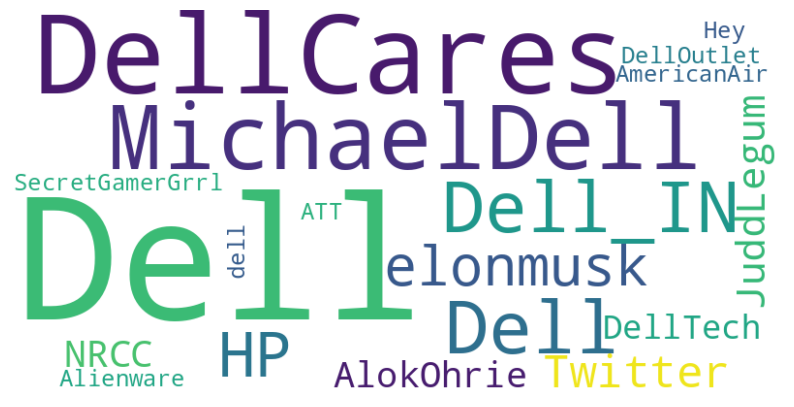

In [46]:
# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict2 = dict(zip(df_common_negative['word'], df_common_negative['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict2)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
df= pd.read_csv("sentiment_tweets.csv")
only_positive = df[df["sentiment"].str.contains("positive")] # only the positive


count = Counter()
for text in only_positive['emotion']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words_positive=count.most_common() # showing he top 20
common_words_positive

[('joy', 5075),
 ('anticipation', 1182),
 ('optimism', 793),
 ('anger', 153),
 ('sadness', 62),
 ('disgust', 58),
 ('fear', 33),
 ('surprise', 10)]

In [74]:
df_common_positive= pd.DataFrame(common_words_positive)
df_common_positive

,0,1
0,joy,5075
1,anticipation,1182
2,optimism,793
3,anger,153
4,sadness,62
5,disgust,58
6,fear,33
7,surprise,10


In [75]:
df_common_positive= df_common_positive.rename(columns={0: 'word'})
df_common_positive= df_common_positive.rename(columns={1: 'count'})
df_common_positive.style.background_gradient(cmap='Blues')

,word,count
0,joy,5075
1,anticipation,1182
2,optimism,793
3,anger,153
4,sadness,62
5,disgust,58
6,fear,33
7,surprise,10


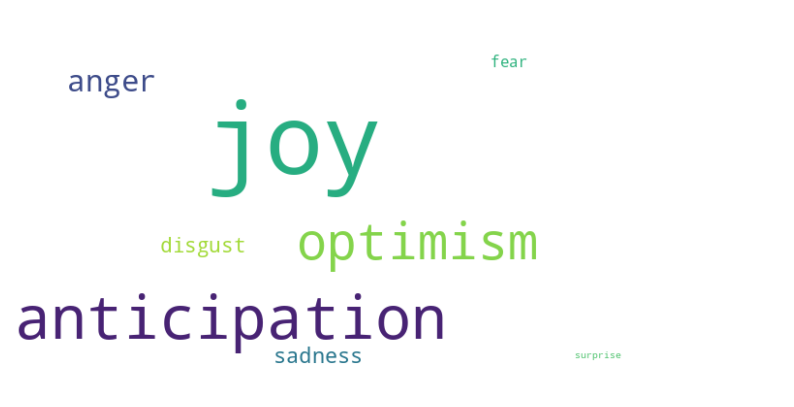

In [76]:
# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict3 = dict(zip(df_common_positive['word'], df_common_positive['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict3)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:
df= pd.read_csv("sentiment_tweets.csv")
only_negative = df[df["sentiment"].str.contains("negative")] # only the positive


count = Counter()
for text in only_negative['emotion']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words_negative=count.most_common() # showing he top 20
common_words_negative

[('anger', 6763),
 ('disgust', 2089),
 ('sadness', 936),
 ('anticipation', 315),
 ('joy', 177),
 ('fear', 170),
 ('optimism', 91),
 ('surprise', 15)]

In [78]:
df_common_negative= pd.DataFrame(common_words_negative)
df_common_negative

,0,1
0,anger,6763
1,disgust,2089
2,sadness,936
3,anticipation,315
4,joy,177
5,fear,170
6,optimism,91
7,surprise,15


In [79]:
df_common_negative= df_common_negative.rename(columns={0: 'word'})
df_common_negative= df_common_negative.rename(columns={1: 'count'})
df_common_negative.style.background_gradient(cmap='Blues')

,word,count
0,anger,6763
1,disgust,2089
2,sadness,936
3,anticipation,315
4,joy,177
5,fear,170
6,optimism,91
7,surprise,15


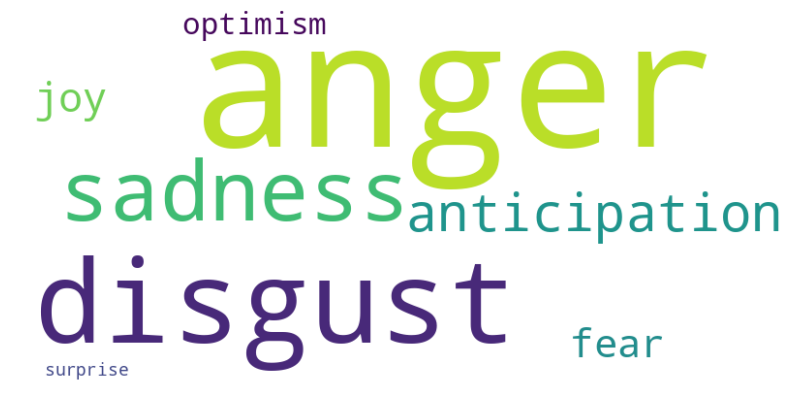

In [80]:
# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict4 = dict(zip(df_common_negative['word'], df_common_negative['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict4)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()